# Anatomy of Pandas

In [46]:
import pandas as pd
import numpy as np
import datetime as dt

## Basic Datatypes

### Series

In [9]:
# Series are a (comparatively) thin wrapper around arrays

In [83]:
# Get an array to work with

x = np.random.normal(size=(100,))

In [61]:
# Turn this into a Series

simple_series = pd.Series(x)

# This contains the same data - but note the index column on the left
# All Series objects contain and Index in addition to their data
simple_series

0     0.467714
1    -0.517086
2    -1.767929
3     0.074313
4     1.161692
        ...   
95   -0.356132
96    2.025900
97   -0.155076
98    1.768928
99    0.361211
Length: 100, dtype: float64

In [62]:
# By default, this index is an ordinal count (from 0), so the same as numpy/C indexes
# But, the similarity ends here!
# Pandas indexes are persistent, and will be subsetted along with data

simple_series[10:20]

10   -1.054306
11   -0.623017
12   -0.015349
13    1.650124
14   -1.457454
15   -0.451812
16    1.409326
17   -2.513353
18   -0.199006
19   -0.705111
dtype: float64

In [30]:
# Pandas indexes can be of (almost) any datatype
# The library includes some very useful and common cases - in particular, the DatetimeIndex
# There are many ways to construct these - we will use some of Pandas builtin tools for these examples

dti = pd.date_range('1 jun 2000', periods=100, freq='d')

# As you can see, this is a special class - it is not a Series or an Array, although it shares some features

dti

DatetimeIndex(['2000-06-01', '2000-06-02', '2000-06-03', '2000-06-04',
               '2000-06-05', '2000-06-06', '2000-06-07', '2000-06-08',
               '2000-06-09', '2000-06-10', '2000-06-11', '2000-06-12',
               '2000-06-13', '2000-06-14', '2000-06-15', '2000-06-16',
               '2000-06-17', '2000-06-18', '2000-06-19', '2000-06-20',
               '2000-06-21', '2000-06-22', '2000-06-23', '2000-06-24',
               '2000-06-25', '2000-06-26', '2000-06-27', '2000-06-28',
               '2000-06-29', '2000-06-30', '2000-07-01', '2000-07-02',
               '2000-07-03', '2000-07-04', '2000-07-05', '2000-07-06',
               '2000-07-07', '2000-07-08', '2000-07-09', '2000-07-10',
               '2000-07-11', '2000-07-12', '2000-07-13', '2000-07-14',
               '2000-07-15', '2000-07-16', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20', '2000-07-21', '2000-07-22',
               '2000-07-23', '2000-07-24', '2000-07-25', '2000-07-26',
      

In [63]:
# Rebuild our Series using the DatetimeIndex

date_series = pd.Series(x, index=dti)

date_series

2000-06-01    0.467714
2000-06-02   -0.517086
2000-06-03   -1.767929
2000-06-04    0.074313
2000-06-05    1.161692
                ...   
2000-09-04   -0.356132
2000-09-05    2.025900
2000-09-06   -0.155076
2000-09-07    1.768928
2000-09-08    0.361211
Freq: D, Length: 100, dtype: float64

<AxesSubplot:>

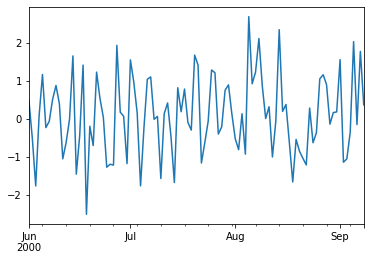

In [64]:
s.plot()

In [65]:
# Now, indexing into the Series will use the Index data itself as index locations - not simply an integer index

start_date = dt.datetime(2000,7,15)

date_series[start_date]

0.8143144611019456

In [66]:
# DatetimeIndexes wrap the standard Python datetime library.  Get to the know this library, it makes working with indexing much easier!

end_date = start_date + dt.timedelta(10)

start_date, end_date

(datetime.datetime(2000, 7, 15, 0, 0), datetime.datetime(2000, 7, 25, 0, 0))

In [67]:
# Note that unlike indexing with integers, indexing into a Series or DataFrame with a custom index class will
# select data inclusively (ie it is a closed interval on both ends) 

date_series[start_date:end_date]

2000-07-15    0.814314
2000-07-16    0.183300
2000-07-17    0.779729
2000-07-18   -0.097971
2000-07-19   -0.298770
2000-07-20    1.670993
2000-07-21    1.409338
2000-07-22   -1.164813
2000-07-23   -0.628794
2000-07-24   -0.065958
2000-07-25    1.279264
Freq: D, dtype: float64

In [68]:
# You can still access the contents of a Series by (0-based) ordinal indexing, by using the iloc method
# Note that iloc indexes are also inclusive

date_series.iloc[0:10]

2000-06-01    0.467714
2000-06-02   -0.517086
2000-06-03   -1.767929
2000-06-04    0.074313
2000-06-05    1.161692
2000-06-06   -0.234294
2000-06-07   -0.068589
2000-06-08    0.511752
2000-06-09    0.873134
2000-06-10    0.392639
Freq: D, dtype: float64

In [106]:
# There is a similar method available that allows indexing by value rather than ordinal indexing
# Looks kind of pointless, since we can just use indexes...
# It will be important later!

date_series.loc[start_date:end_date]

2000-07-15    0.814314
2000-07-16    0.183300
2000-07-17    0.779729
2000-07-18   -0.097971
2000-07-19   -0.298770
2000-07-20    1.670993
2000-07-21    1.409338
2000-07-22   -1.164813
2000-07-23   -0.628794
2000-07-24   -0.065958
2000-07-25    1.279264
Freq: D, dtype: float64

In [82]:
# The index of a Series is available as its own object - this will also be very useful later
date_series.iloc[0:10].index

DatetimeIndex(['2000-06-01', '2000-06-02', '2000-06-03', '2000-06-04',
               '2000-06-05', '2000-06-06', '2000-06-07', '2000-06-08',
               '2000-06-09', '2000-06-10'],
              dtype='datetime64[ns]', freq='D')

<AxesSubplot:>

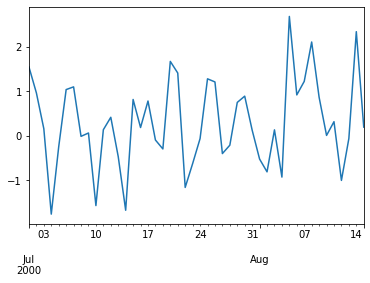

In [74]:
# Pandas has lots of convenience shortcuts, especially useful for interactive use

date_series['jul 2000':'aug 15 2000'].plot()

### DataFrame

A DataFrame can be thought of as a collection of Series with a shared Index

In [87]:
# Let's construct a minimal DataFrame with just one Series - the date_series from above

df = pd.DataFrame({'x': date_series})

In [88]:
# So far it doesn't contain anything additional to the Series data - with the exception of a Column name, 'x'

df

,x
2000-06-01,0.467714
2000-06-02,-0.517086
2000-06-03,-1.767929
2000-06-04,0.074313
2000-06-05,1.161692
...,...
2000-09-04,-0.356132
2000-09-05,2.025900
2000-09-06,-0.155076
2000-09-07,1.768928


In [99]:
# Columns are selected using standard indexing
# Selecting a single column will return the Series containing that column's data

df['x']

2000-06-01    0.467714
2000-06-02   -0.517086
2000-06-03   -1.767929
2000-06-04    0.074313
2000-06-05    1.161692
                ...   
2000-09-04   -0.356132
2000-09-05    2.025900
2000-09-06   -0.155076
2000-09-07    1.768928
2000-09-08    0.361211
Freq: D, Name: x, Length: 100, dtype: float64

In [185]:
# You can also select columns as if they were member variables of the DataFrame object

# Don't!
# Don't ever do this!
# This looks like it works fine...

df.x

2000-06-01    0.467714
2000-06-02   -0.517086
2000-06-03   -1.767929
2000-06-04    0.074313
2000-06-05    1.161692
                ...   
2000-09-04   -0.356132
2000-09-05    2.025900
2000-09-06   -0.155076
2000-09-07    1.768928
2000-09-08    0.361211
Freq: D, Name: x, Length: 100, dtype: float64

In [189]:
# ... but
# DataFrames have hundreds of methods and member variables
# The moment one of your columns shares a name with them, this happens...

bad_df = pd.DataFrame({'columns': [0,1,5,2]})
bad_df

,columns
0,0
1,1
2,5
3,2


In [190]:
bad_df.columns

Index(['columns'], dtype='object')

In [100]:
# Because DataFrames are indexed 'column first', passing index values directly in will cause an error

df[start_date]

KeyError: datetime.datetime(2000, 7, 15, 0, 0)

In [102]:
# Or maybe they won't?

df['jul 2000']

,x
2000-07-01,1.545645
2000-07-02,0.962036
2000-07-03,0.155360
2000-07-04,-1.765149
2000-07-05,-0.249673
2000-07-06,1.037177
2000-07-07,1.098104
2000-07-08,-0.015436
2000-07-09,0.059869
2000-07-10,-1.573151


In [109]:
# Pandas is a big, complicated library with a lot of baggage and technical debt ("backwards compatibility")
# Wherever possible, use the least ambiguous methods you can
# In this case, that is the loc method (I told you it would be important)

df.loc[start_date]

x    0.814314
Name: 2000-07-15 00:00:00, dtype: float64

In [110]:
# Now, let's get a more complicated DataFrame from some real AuTuMN data

In [112]:
from autumn.tools.runs import ManagedRun

In [113]:
mr = ManagedRun("covid_19/hume/1633437782/f6ca627")

In [115]:
param_df = mr.calibration.get_mcmc_params()

In [118]:
# These are the parameters of a calibration run

param_df

name,contact_rate,seasonal_force,sojourn.compartment_periods_calculated.active.total_period,sojourn.compartment_periods_calculated.exposed.total_period,testing_to_detection.assumed_cdr_parameter,vaccination.fully_vaccinated.vacc_reduce_infectiousness,vic_2021_seeding.seed_time
urun,,,,,,,
00_000000,0.310000,0.300000,6.431725,6.095799,0.179000,0.399250,579.600000
00_000001,0.315049,0.300039,6.251200,6.367079,0.206367,0.399262,579.355341
00_000004,0.309525,0.314706,5.936672,6.061918,0.231034,0.399265,579.634968
00_000005,0.304808,0.288039,5.822653,6.211969,0.233130,0.399338,579.738824
00_000007,0.293380,0.298822,5.734581,6.354985,0.228510,0.399327,579.769356
...,...,...,...,...,...,...,...
06_013569,0.163960,0.151930,6.490330,7.234280,0.120598,0.125732,570.507619
06_013575,0.194805,0.033505,6.484372,7.069195,0.172490,0.297382,572.406816
06_013586,0.186649,0.193196,6.542698,6.848346,0.191680,0.250358,576.166400


In [121]:
# As you can see, there are multiple columns in this run; you can access this programatically
# Columns is also an Index!  Just one that runs along a different axis

param_df.columns

Index(['contact_rate', 'seasonal_force',
       'sojourn.compartment_periods_calculated.active.total_period',
       'sojourn.compartment_periods_calculated.exposed.total_period',
       'testing_to_detection.assumed_cdr_parameter',
       'vaccination.fully_vaccinated.vacc_reduce_infectiousness',
       'vic_2021_seeding.seed_time'],
      dtype='object', name='name')

In [128]:
# Multiple columns can be selected at once.
# This is extremely useful in a programattic context, where lists can be generated in code and then used as arguments in indexing

param_df[['seasonal_force','vic_2021_seeding.seed_time','contact_rate']]

name,seasonal_force,vic_2021_seeding.seed_time,contact_rate
urun,,,
00_000000,0.300000,579.600000,0.310000
00_000001,0.300039,579.355341,0.315049
00_000004,0.314706,579.634968,0.309525
00_000005,0.288039,579.738824,0.304808
00_000007,0.298822,579.769356,0.293380
...,...,...,...
06_013569,0.151930,570.507619,0.163960
06_013575,0.033505,572.406816,0.194805
06_013586,0.193196,576.166400,0.186649


In [129]:
# Let's get another DataFrame

mcmc_runs_df = mr.calibration.get_mcmc_runs()

In [130]:
mcmc_runs_df

,accept,ap_loglikelihood,chain,loglikelihood,run,weight
urun,,,,,,
00_000000,1,-6792.996278,0,-6785.501137,0,1
00_000001,1,-4817.738680,0,-4809.701547,1,3
00_000002,0,-13424.536111,0,-13416.975356,2,0
00_000003,0,-5479.888194,0,-5471.361788,3,0
00_000004,1,-1737.656560,0,-1729.919473,4,1
...,...,...,...,...,...,...
06_013633,1,-7.943395,6,-7.028585,13633,5
06_013634,0,-14.184843,6,-9.197962,13634,0
06_013635,0,-55.774993,6,-53.755538,13635,0


In [137]:
# Boolean comparisons on Pandas objects produce boolean arrays, just like numpy

mcmc_runs_df['run'] > 500

urun
00_000000    False
00_000001    False
00_000002    False
00_000003    False
00_000004    False
             ...  
06_013633     True
06_013634     True
06_013635     True
06_013636     True
06_013637     True
Name: run, Length: 95812, dtype: bool

In [141]:
# You can use these to select subsets of Series or DataFrames

burned_df = mcmc_runs_df[mcmc_runs_df['run'] > 500]
burned_df

,accept,ap_loglikelihood,chain,loglikelihood,run,weight
urun,,,,,,
00_000501,1,-8.665956,0,-6.557245,501,1
00_000502,1,-7.490372,0,-6.723990,502,1
00_000503,1,-7.567090,0,-6.658859,503,4
00_000504,0,-13.916647,0,-9.753618,504,0
00_000505,0,-18.555490,0,-8.239312,505,0
...,...,...,...,...,...,...
06_013633,1,-7.943395,6,-7.028585,13633,5
06_013634,0,-14.184843,6,-9.197962,13634,0
06_013635,0,-55.774993,6,-53.755538,13635,0


In [152]:
# Take care to make sure your index matches the object you are indexing
# The following example will throw an exception in some versions of pandas, but just produce a warning in later versions
# Either way - don't do it!  Warnings exist for a reason, and if you see one, there is almost certainly a better way
# to write the code that produced it

burned_df[mcmc_runs_df['accept'] == 1] 

c:\dev\anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,accept,ap_loglikelihood,chain,loglikelihood,run,weight
urun,,,,,,
00_000501,1,-8.665956,0,-6.557245,501,1
00_000502,1,-7.490372,0,-6.723990,502,1
00_000503,1,-7.567090,0,-6.658859,503,4
00_000507,1,-6.688142,0,-7.189943,507,8
00_000515,1,-7.376475,0,-7.274972,515,3
...,...,...,...,...,...,...
06_013569,1,-6.798210,6,-6.670902,13569,6
06_013575,1,-7.734596,6,-6.823063,13575,11
06_013586,1,-7.785387,6,-7.495419,13586,39


In [151]:
# Same object use for comparison and indexing - no complaints

burned_df[burned_df['accept'] == 1] 

,accept,ap_loglikelihood,chain,loglikelihood,run,weight
urun,,,,,,
00_000501,1,-8.665956,0,-6.557245,501,1
00_000502,1,-7.490372,0,-6.723990,502,1
00_000503,1,-7.567090,0,-6.658859,503,4
00_000507,1,-6.688142,0,-7.189943,507,8
00_000515,1,-7.376475,0,-7.274972,515,3
...,...,...,...,...,...,...
06_013569,1,-6.798210,6,-6.670902,13569,6
06_013575,1,-7.734596,6,-6.823063,13575,11
06_013586,1,-7.785387,6,-7.495419,13586,39


In [157]:
# You can combine boolean indexes using boolean operators

mcmc_runs_df[(mcmc_runs_df['run'] > 500) & (mcmc_runs_df['accept'] == 1)]

,accept,ap_loglikelihood,chain,loglikelihood,run,weight
urun,,,,,,
00_000501,1,-8.665956,0,-6.557245,501,1
00_000502,1,-7.490372,0,-6.723990,502,1
00_000503,1,-7.567090,0,-6.658859,503,4
00_000507,1,-6.688142,0,-7.189943,507,8
00_000515,1,-7.376475,0,-7.274972,515,3
...,...,...,...,...,...,...
06_013569,1,-6.798210,6,-6.670902,13569,6
06_013575,1,-7.734596,6,-6.823063,13575,11
06_013586,1,-7.785387,6,-7.495419,13586,39


In [167]:
# Still.. that all seems a bit cumbersome
# OK, we're going to cheat a little here and use a custom function from the autumn library that makes life with pandas a little easier

from autumn.tools.utils.pandas import pdfilt

selected_runs = pdfilt(mcmc_runs_df, ["run > 500", "accept == 1"])
selected_runs

,accept,ap_loglikelihood,chain,loglikelihood,run,weight
urun,,,,,,
00_000501,1,-8.665956,0,-6.557245,501,1
00_000502,1,-7.490372,0,-6.723990,502,1
00_000503,1,-7.567090,0,-6.658859,503,4
00_000507,1,-6.688142,0,-7.189943,507,8
00_000515,1,-7.376475,0,-7.274972,515,3
...,...,...,...,...,...,...
06_013569,1,-6.798210,6,-6.670902,13569,6
06_013575,1,-7.734596,6,-6.823063,13575,11
06_013586,1,-7.785387,6,-7.495419,13586,39


In [161]:
# Now, we can access the index, and do something useful with it...

In [162]:
selected_runs.index

Index(['00_000501', '00_000502', '00_000503', '00_000507', '00_000515',
       '00_000518', '00_000521', '00_000522', '00_000524', '00_000528',
       ...
       '06_013534', '06_013540', '06_013543', '06_013555', '06_013556',
       '06_013569', '06_013575', '06_013586', '06_013625', '06_013633'],
      dtype='object', name='urun', length=14332)

In [165]:
# Get the parameters from our params_df, using the index of our selected runs

param_df.loc[selected_runs.index]

name,contact_rate,seasonal_force,sojourn.compartment_periods_calculated.active.total_period,sojourn.compartment_periods_calculated.exposed.total_period,testing_to_detection.assumed_cdr_parameter,vaccination.fully_vaccinated.vacc_reduce_infectiousness,vic_2021_seeding.seed_time
urun,,,,,,,
00_000501,0.167423,0.160336,7.458545,7.549535,0.199265,0.388981,563.969193
00_000502,0.148925,0.184694,7.577948,6.934213,0.151984,0.386427,562.167842
00_000503,0.169277,0.292169,6.578609,7.521064,0.182093,0.390304,566.774101
00_000507,0.155225,0.218141,6.951047,6.759124,0.148342,0.390765,565.894771
00_000515,0.156938,0.287098,6.851285,7.215896,0.218167,0.390200,561.585718
...,...,...,...,...,...,...,...
06_013569,0.163960,0.151930,6.490330,7.234280,0.120598,0.125732,570.507619
06_013575,0.194805,0.033505,6.484372,7.069195,0.172490,0.297382,572.406816
06_013586,0.186649,0.193196,6.542698,6.848346,0.191680,0.250358,576.166400


## Pivots, Melts, MultiIndexing

In [193]:
# Those DataFrames above looked nice.  A little too nice.  Is that even our data?

raw_params = mr.calibration.get_mcmc_params(raw=True)

raw_params

,chain,name,run,value,urun
0,0,contact_rate,0,0.310000,00_000000
1,0,seasonal_force,0,0.300000,00_000000
2,0,vaccination.fully_vaccinated.vacc_reduce_infec...,0,0.399250,00_000000
3,0,testing_to_detection.assumed_cdr_parameter,0,0.179000,00_000000
4,0,vic_2021_seeding.seed_time,0,579.600000,00_000000
...,...,...,...,...,...
108691,6,vaccination.fully_vaccinated.vacc_reduce_infec...,13633,0.339381,06_013633
108692,6,testing_to_detection.assumed_cdr_parameter,13633,0.196358,06_013633
108693,6,vic_2021_seeding.seed_time,13633,574.488755,06_013633
108694,6,sojourn.compartment_periods_calculated.exposed...,13633,6.796700,06_013633


In [213]:
# To reshape this DataFrame, we use the pivot_table method
# This needs to know which columns contain Index data, and which contain Column identifiers
# In this case, 'urun' has been handily filled in by combining run and chain in an earlier step, 
# so we can use this directly as an index

raw_params.pivot_table(index='urun',columns='name')

chain                 \
name      contact_rate seasonal_force   
urun                                    
00_000000            0              0   
00_000001            0              0   
00_000004            0              0   
00_000005            0              0   
00_000007            0              0   
...                ...            ...   
06_013569            6              6   
06_013575            6              6   
06_013586            6              6   
06_013625            6              6   
06_013633            6              6   

                                                                      \
name      sojourn.compartment_periods_calculated.active.total_period   
urun                                                                   
00_000000                                                  0           
00_000001                                                  0           
00_000004                                                  0           
00_000005                                                  0           
00_000007                                                  0           
...                                                      ...           
06_013569                                                  6           
06_013575                                                  6           
06_013586                                                  6           
06_013625                                                  6           
06_013633                                                  6           

                                                                       \
name      sojourn.compartment_periods_calculated.exposed.total_period   
urun                                                                    
00_000000                                                  0            
00_000001                                                  0            
00_000004                                                  0            
00_000005                                                  0            
00_000007                                                  0            
...                                                      ...            
06_013569                                                  6            
06_013575                                                  6            
06_013586                                                  6            
06_013625                                                  6            
06_013633                                                  6            

                                                      \
name      testing_to_detection.assumed_cdr_parameter   
urun                                                   
00_000000                                          0   
00_000001                                          0   
00_000004                                          0   
00_000005                                          0   
00_000007                                          0   
...                                              ...   
06_013569                                          6   
06_013575                                          6   
06_013586                                          6   
06_013625                                          6   
06_013633                                          6   

                                                                   \
name      vaccination.fully_vaccinated.vacc_reduce_infectiousness   
urun                                                                
00_000000                                                  0        
00_000001                                                  0        
00_000004                                                  0        
00_000005                                                  0        
00_000007                                                  0        
...                                                      ...        
06_0

In [219]:
# Hang on, that looks a bit weird - we've still got the chain and run columns in there, confusing matters... 
# Use drop to tidy things up

raw_params_urun = raw_params.drop(['chain','run'],axis='columns')
raw_params_urun.pivot_table(index='urun',columns='name')

value                 \
name      contact_rate seasonal_force   
urun                                    
00_000000     0.310000       0.300000   
00_000001     0.315049       0.300039   
00_000004     0.309525       0.314706   
00_000005     0.304808       0.288039   
00_000007     0.293380       0.298822   
...                ...            ...   
06_013569     0.163960       0.151930   
06_013575     0.194805       0.033505   
06_013586     0.186649       0.193196   
06_013625     0.158634       0.275793   
06_013633     0.194770       0.307464   

                                                                      \
name      sojourn.compartment_periods_calculated.active.total_period   
urun                                                                   
00_000000                                           6.431725           
00_000001                                           6.251200           
00_000004                                           5.936672           
00_000005                                           5.822653           
00_000007                                           5.734581           
...                                                      ...           
06_013569                                           6.490330           
06_013575                                           6.484372           
06_013586                                           6.542698           
06_013625                                           6.730953           
06_013633                                           7.007508           

                                                                       \
name      sojourn.compartment_periods_calculated.exposed.total_period   
urun                                                                    
00_000000                                           6.095799            
00_000001                                           6.367079            
00_000004                                           6.061918            
00_000005                                           6.211969            
00_000007                                           6.354985            
...                                                      ...            
06_013569                                           7.234280            
06_013575                                           7.069195            
06_013586                                           6.848346            
06_013625                                           6.948629            
06_013633                                           6.796700            

                                                      \
name      testing_to_detection.assumed_cdr_parameter   
urun                                                   
00_000000                                   0.179000   
00_000001                                   0.206367   
00_000004                                   0.231034   
00_000005                                   0.233130   
00_000007                                   0.228510   
...                                              ...   
06_013569                                   0.120598   
06_013575                                   0.172490   
06_013586                                   0.191680   
06_013625                                   0.122157   
06_013633                                   0.196358   

                                                                   \
name      vaccination.fully_vaccinated.vacc_reduce_infectiousness   
urun                                                                
00_000000                                           0.399250        
00_000001                                           0.399262        
00_000004                                           0.399265        
00_000005                                           0.399338        
00_000007                                           0.399327        
...                                                      ...        
06_0

In [220]:
# An alternative, if we don't have a unique identifier, or more importantly want to retain access to both these 
# "dimensions", is to use a MultiIndex
# We'll drop 'urun', and build an index using both chain and run

midx_df = raw_params.drop('urun',axis='columns').pivot_table(index=['chain','run'], columns='name')
midx_df

value                 \
name        contact_rate seasonal_force   
chain run                                 
0     0         0.310000       0.300000   
      1         0.315049       0.300039   
      4         0.309525       0.314706   
      5         0.304808       0.288039   
      7         0.293380       0.298822   
...                  ...            ...   
6     13569     0.163960       0.151930   
      13575     0.194805       0.033505   
      13586     0.186649       0.193196   
      13625     0.158634       0.275793   
      13633     0.194770       0.307464   

                                                                        \
name        sojourn.compartment_periods_calculated.active.total_period   
chain run                                                                
0     0                                               6.431725           
      1                                               6.251200           
      4                                               5.936672           
      5                                               5.822653           
      7                                               5.734581           
...                                                        ...           
6     13569                                           6.490330           
      13575                                           6.484372           
      13586                                           6.542698           
      13625                                           6.730953           
      13633                                           7.007508           

                                                                         \
name        sojourn.compartment_periods_calculated.exposed.total_period   
chain run                                                                 
0     0                                               6.095799            
      1                                               6.367079            
      4                                               6.061918            
      5                                               6.211969            
      7                                               6.354985            
...                                                        ...            
6     13569                                           7.234280            
      13575                                           7.069195            
      13586                                           6.848346            
      13625                                           6.948629            
      13633                                           6.796700            

                                                        \
name        testing_to_detection.assumed_cdr_parameter   
chain run                                                
0     0                                       0.179000   
      1                                       0.206367   
      4                                       0.231034   
      5                                       0.233130   
      7                                       0.228510   
...                                                ...   
6     13569                                   0.120598   
      13575                                   0.172490   
      13586                                   0.191680   
      13625                                   0.122157   
      13633                                   0.196358   

                                                                     \
name        vaccination.fully_vaccinated.vacc_reduce_infectiousness   
chain run                                                             
0     0                                               0.399250        
      1                                               0.399262        
      4                                               0.399265        
      5                                               0.399338        
      7           

In [225]:
# MultiIndexes work a bit more like multidimensional arrays
# You can index by either subsetting on a single dimension...

midx_df.loc[6]

value                 \
name  contact_rate seasonal_force   
run                                 
0         0.310000       0.300000   
2         0.294601       0.310769   
3         0.276121       0.313230   
4         0.267839       0.303196   
5         0.252944       0.302167   
...            ...            ...   
13569     0.163960       0.151930   
13575     0.194805       0.033505   
13586     0.186649       0.193196   
13625     0.158634       0.275793   
13633     0.194770       0.307464   

                                                                  \
name  sojourn.compartment_periods_calculated.active.total_period   
run                                                                
0                                               6.431725           
2                                               6.400489           
3                                               6.435406           
4                                               5.985736           
5                                               6.181439           
...                                                  ...           
13569                                           6.490330           
13575                                           6.484372           
13586                                           6.542698           
13625                                           6.730953           
13633                                           7.007508           

                                                                   \
name  sojourn.compartment_periods_calculated.exposed.total_period   
run                                                                 
0                                               6.095799            
2                                               6.288062            
3                                               6.231056            
4                                               6.172263            
5                                               5.902418            
...                                                  ...            
13569                                           7.234280            
13575                                           7.069195            
13586                                           6.848346            
13625                                           6.948629            
13633                                           6.796700            

                                                  \
name  testing_to_detection.assumed_cdr_parameter   
run                                                
0                                       0.179000   
2                                       0.199011   
3                                       0.168185   
4                                       0.165825   
5                                       0.173290   
...                                          ...   
13569                                   0.120598   
13575                                   0.172490   
13586                                   0.191680   
13625                                   0.122157   
13633                                   0.196358   

                                                               \
name  vaccination.fully_vaccinated.vacc_reduce_infectiousness   
run                                                             
0                                               0.399250        
2                                               0.399272        
3                                               0.399287        
4                                               0.399275        
5                                               0.399211        
...                                                  ...        
13569                                           0.125732        
13575                                           0.297382        
13586                                           0.250358        
13625                                           0.175041        


In [226]:
# ... or by passing in multidimensional coordinates

midx_df.loc[6,13569]

       name                                                       
value  contact_rate                                                     0.163960
       seasonal_force                                                   0.151930
       sojourn.compartment_periods_calculated.active.total_period       6.490330
       sojourn.compartment_periods_calculated.exposed.total_period      7.234280
       testing_to_detection.assumed_cdr_parameter                       0.120598
       vaccination.fully_vaccinated.vacc_reduce_infectiousness          0.125732
       vic_2021_seeding.seed_time                                     570.507619
Name: (6, 13569), dtype: float64

In [227]:
# Because columns are just Indexes on another axis, there can by column MultiIndexes too

In [228]:
pbi = mr.powerbi.get_db()

In [230]:
udf = pbi.get_uncertainty()

In [231]:
udf

type             cdr                                                    \
scenario           0                                                     
quantile       0.010     0.025     0.250     0.500     0.750     0.975   
2021-03-29  0.206405  0.208649  0.256860  0.318821  0.384943  0.455796   
2021-03-30  0.203580  0.205798  0.253461  0.314789  0.380330  0.450682   
2021-03-31  0.201816  0.204017  0.251338  0.312267  0.377442  0.447475   
2021-04-01  0.202633  0.204842  0.252322  0.313436  0.378781  0.448962   
2021-04-02  0.204670  0.206898  0.254773  0.316345  0.382112  0.452658   
...              ...       ...       ...       ...       ...       ...   
2021-12-26  0.608686  0.613158  0.700261  0.789479  0.860902  0.915356   
2021-12-27  0.608686  0.613158  0.700261  0.789479  0.860902  0.915356   
2021-12-28  0.608686  0.613158  0.700261  0.789479  0.860902  0.915356   
2021-12-29  0.608686  0.613158  0.700261  0.789479  0.860902  0.915356   
2021-12-30  0.608686  0.613158  0.700261  0.789479  0.860902  0.915356   

type                                                ...  \
scenario                     1                      ...   
quantile       0.990     0.010     0.025     0.250  ...   
2021-03-29  0.459256       NaN       NaN       NaN  ...   
2021-03-30  0.454122       NaN       NaN       NaN  ...   
2021-03-31  0.450901       NaN       NaN       NaN  ...   
2021-04-01  0.452394       NaN       NaN       NaN  ...   
2021-04-02  0.456106       NaN       NaN       NaN  ...   
...              ...       ...       ...       ...  ...   
2021-12-26  0.917519  0.608686  0.613158  0.700261  ...   
2021-12-27  0.917519  0.608686  0.613158  0.700261  ...   
2021-12-28  0.917519  0.608686  0.613158  0.700261  ...   
2021-12-29  0.917519  0.608686  0.613158  0.700261  ...   
2021-12-30  0.917519  0.608686  0.613158  0.700261  ...   

type       proportion_seropositiveXagegroup_75                                \
scenario                                     0                                 
quantile                                 0.025     0.250     0.500     0.750   
2021-03-29                            0.000000  0.000000  0.000000  0.000000   
2021-03-30                            0.000000  0.000000  0.000000  0.000000   
2021-03-31                            0.000000  0.000000  0.000000  0.000000   
2021-04-01                            0.000000  0.000000  0.000000  0.000000   
2021-04-02                            0.000000  0.000000  0.000000  0.000000   
...                                        ...       ...       ...       ...   
2021-12-26                            0.000025  0.000933  0.002418  0.004524   
2021-12-27                            0.000025  0.000934  0.002419  0.004538   
2021-12-28                            0.000025  0.000934  0.002421  0.004547   
2021-12-29                            0.000025  0.000934  0.002423  0.004556   
2021-12-30                            0.000025  0.000935  0.002424  0.004565   

type                                                                    
scenario                     1                                          
quantile       0.975     0.025     0.250     0.500     0.750     0.975  
2021-03-29  0.000000       NaN       NaN       NaN       NaN       NaN  
2021-03-30  0.000000       NaN       NaN       NaN       NaN       NaN  
2021-03-31  0.000000       NaN       NaN       NaN       NaN       NaN  
2021-04-01  0.000000       NaN       NaN       NaN       NaN       NaN  
2021-04-02  0.000000       NaN       NaN       NaN       NaN       NaN  
...              ...       ...       ...       ...       ...       ...  
2021-12-26  0.013673  0.000025  0.000947  0.002534  0.004999  0.017717  
2021-12-27  0.013803  0.000025  0.000948  0.002539  0.005015  0.017956  
2021-12-28  0.013885  0.000025  0.000949  0.002544  0.005038  0.018194  
2021-12-29  0.014011  0.000025  0.000950  0.002550  0.005060  0.018432  
2021-12-30  0.014219  0.000025  0.000951  0.002555  0.005079  0.01

In [244]:
# Finally - if you need to export this data, especially to CSV or a relational database, use melt
# This is the inverse of pivot_table

# It can require quite a lot of fine tuning, but is important to be aware of

udf.melt()

,type,scenario,quantile,value
0,cdr,0,0.010,0.206405
1,cdr,0,0.010,0.203580
2,cdr,0,0.010,0.201816
3,cdr,0,0.010,0.202633
4,cdr,0,0.010,0.204670
...,...,...,...,...
86973,proportion_seropositiveXagegroup_75,1,0.975,0.017717
86974,proportion_seropositiveXagegroup_75,1,0.975,0.017956
86975,proportion_seropositiveXagegroup_75,1,0.975,0.018194
86976,proportion_seropositiveXagegroup_75,1,0.975,0.018432


In [260]:
melted = udf.melt(ignore_index=False)

In [261]:
melted['date'] = melted.index

In [264]:
melted

,type,scenario,quantile,value,date
2021-03-29,cdr,0,0.010,0.206405,2021-03-29
2021-03-30,cdr,0,0.010,0.203580,2021-03-30
2021-03-31,cdr,0,0.010,0.201816,2021-03-31
2021-04-01,cdr,0,0.010,0.202633,2021-04-01
2021-04-02,cdr,0,0.010,0.204670,2021-04-02
...,...,...,...,...,...
2021-12-26,proportion_seropositiveXagegroup_75,1,0.975,0.017717,2021-12-26
2021-12-27,proportion_seropositiveXagegroup_75,1,0.975,0.017956,2021-12-27
2021-12-28,proportion_seropositiveXagegroup_75,1,0.975,0.018194,2021-12-28
2021-12-29,proportion_seropositiveXagegroup_75,1,0.975,0.018432,2021-12-29
